# Exploratory Data Analysis (EDA) del Dataset de Diabetes Pima

## 1. Introducción
En este notebook, realizaremos un análisis exploratorio de datos (EDA) utilizando el famoso dataset de diabetes Pima, que contiene información médica de mujeres de origen Pima. Nuestro objetivo será explorar los datos, identificar patrones y relaciones entre las variables y preparar el dataset para su posterior modelado.

## 2. Cargar Librerías y Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Cargar el dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=column_names)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Análisis Estadístico Descriptivo

In [6]:
# Descripción estadística básica
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 4. Visualización de Datos

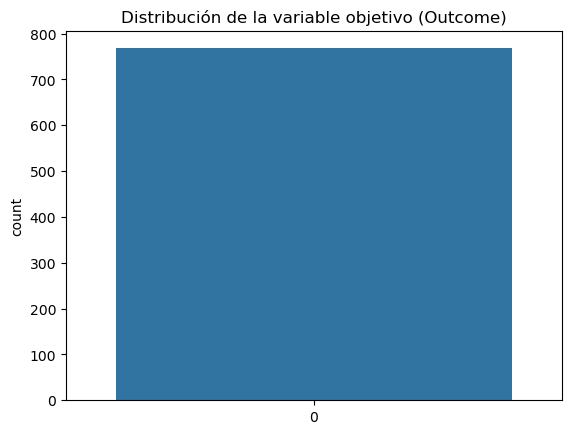

In [8]:
# Distribución de la variable objetivo
sns.countplot(df['Outcome'])
plt.title('Distribución de la variable objetivo (Outcome)')
plt.show()

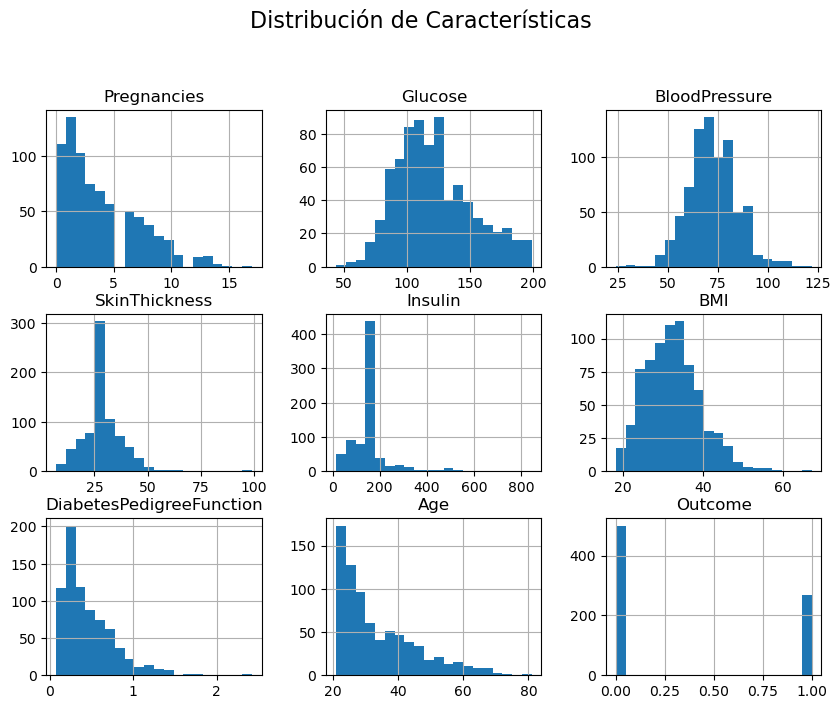

In [34]:
# Distribuciones de características numéricas
df.hist(bins=20, figsize=(10, 10), layout=(4, 3))
plt.suptitle('Distribución de Características', size=16)
plt.show()

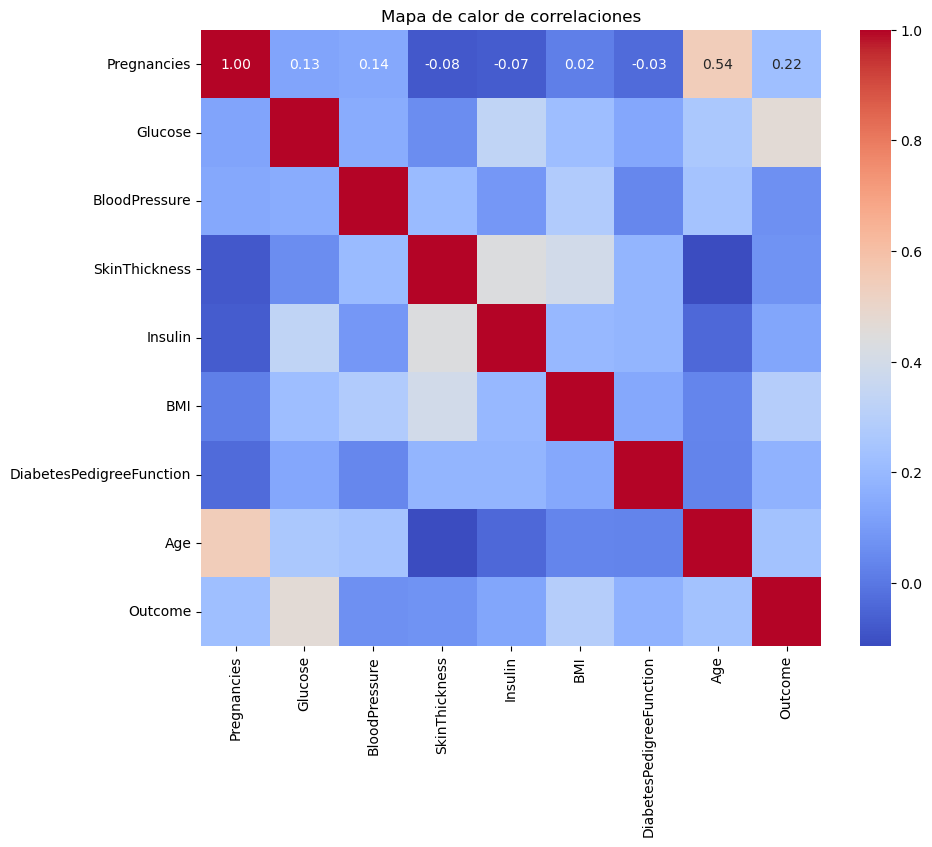

In [10]:
# Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones')
plt.show()

## 5. Identificación de Valores Atípicos

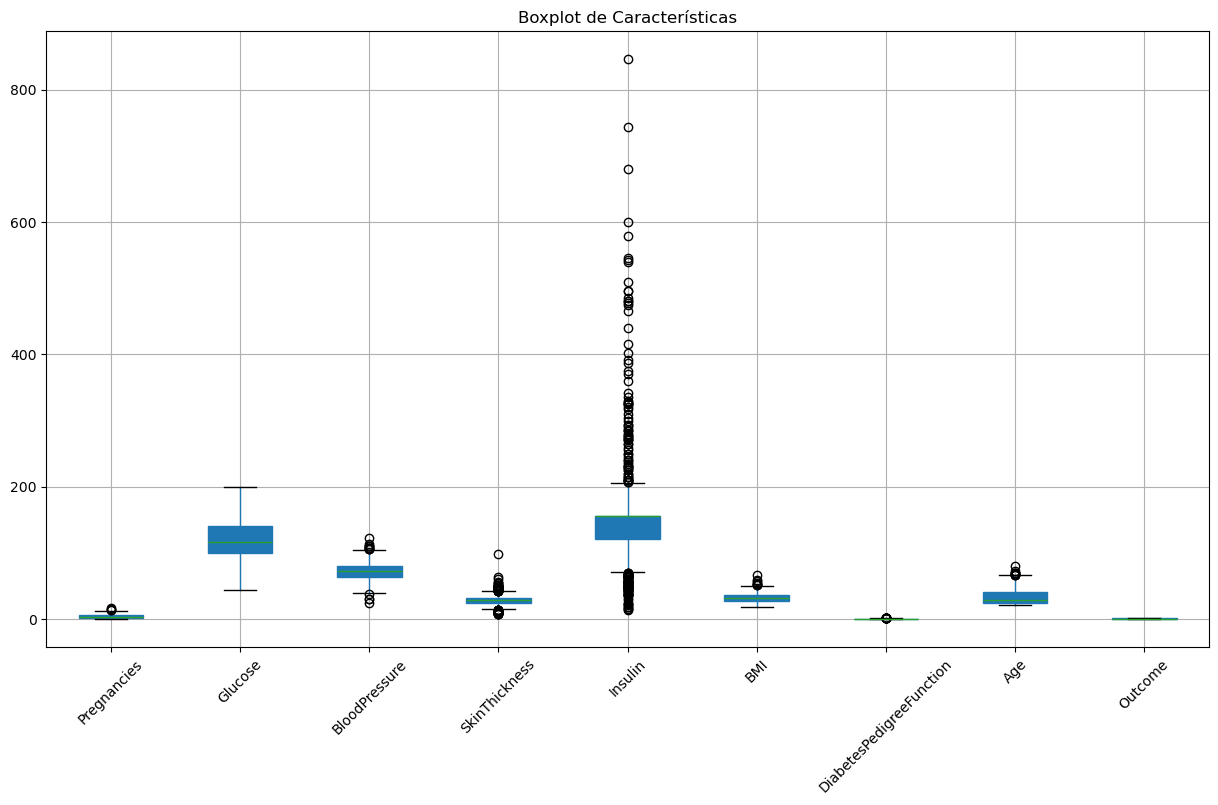

In [36]:
# Detección de outliers utilizando boxplots
plt.figure(figsize=(15, 8))
df.boxplot(patch_artist=True)
plt.xticks(rotation=45)
plt.title('Boxplot de Características')
plt.show()

In [13]:
# Identificación de outliers con Z-Score
z_scores = np.abs(stats.zscore(df))
outliers = df[(z_scores > 3).any(axis=1)]
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
695,7,142,90,24,480,30.4,0.128,43,1
697,0,99,0,0,0,25.0,0.253,22,0
703,2,129,0,0,0,38.5,0.304,41,0
706,10,115,0,0,0,0.0,0.261,30,1


## 6. Limpieza de Datos

In [15]:
# Reemplazo de ceros por NaN en columnas específicas
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Reemplazo de valores faltantes con la media de cada columna
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 7. Análisis de Distribuciones después de la Limpieza

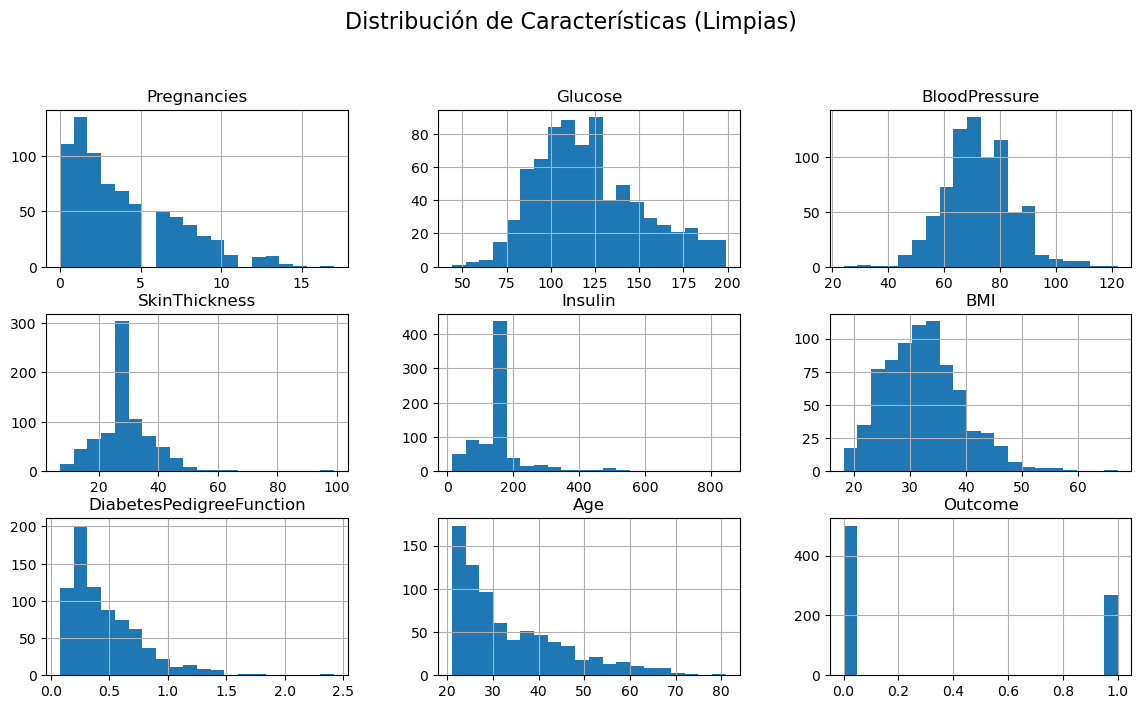

In [38]:
# Visualización de distribuciones después de la limpieza de datos
df.hist(bins=20, figsize=(14, 10), layout=(4, 3))
plt.suptitle('Distribución de Características (Limpias)', size=16)
plt.show()

## 8. Preparación de Datos para Modelado

In [19]:
# Separación de características (X) y variable objetivo (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Escalado de características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


## 9. Conclusiones

En este EDA, hemos explorado y limpiado el dataset de diabetes Pima, identificando patrones importantes y preparando los datos para su posterior modelado. Los próximos pasos incluirían la implementación de modelos de machine learning y la evaluación de su rendimiento en la predicción de la diabetes en esta población.